# Loan-Prediction

In [63]:
#Lets load required libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
train = pd.read_csv("train.csv")

In [66]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

LoanAmount has 22 missing values.
Loan_Amount_Term has 14 missing values.
Credit_History has 50 missig values

In [69]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

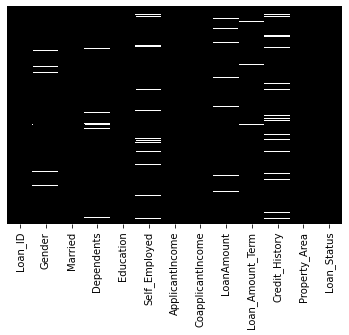

In [70]:
#Finding the locations of missing data
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap ='cubehelix')
#white dash represents missing points

the non-numeric columns Gender, Dependents, Self_Employed also have missing values.

In [71]:
print(train['Gender'].isna().sum())
print(train['Dependents'].isna().sum())
print(train['Self_Employed'].isna().sum())

13
15
32


Hence, Gender has 13, Dependents has 15 and Self_Employed has 32 missing values.

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

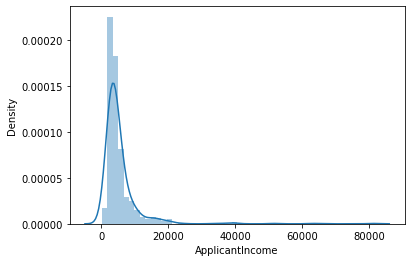

In [72]:
sns.distplot(train['ApplicantIncome'])

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ApplicantIncome'>

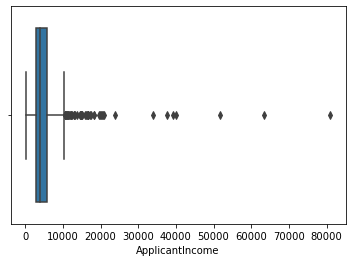

In [73]:
sns.boxplot(train['ApplicantIncome'])

Hence, there are few extreme values when it comes to the Applicant Income.
But, the majority of applicants have income within 20000.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

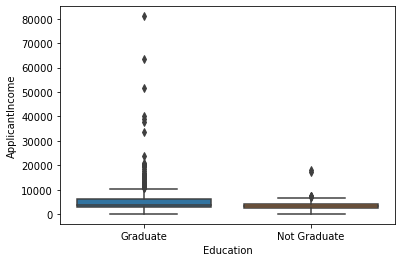

In [74]:
sns.boxplot(y='ApplicantIncome', data=train, x='Education')

there is no substantial difference between the mean income of graduates and non-graduates.
But, there are many graduates with high income

<AxesSubplot:>

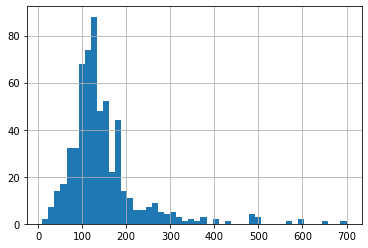

In [75]:
train['LoanAmount'].hist(bins=50)

<AxesSubplot:>

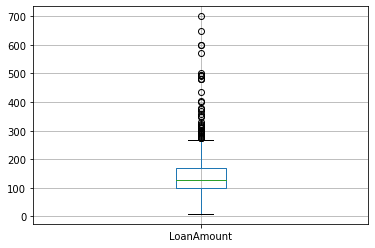

In [76]:
train.boxplot(column='LoanAmount')

there are some extreme values. And LoanAmountt also has some missing values. So, we need to clean the data.

In [77]:
#frequence table for credit history
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [78]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

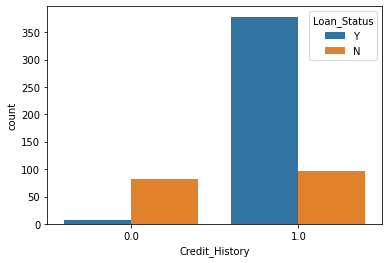

In [79]:
#Probability of getting loan by Credit history 
sns.countplot(x= 'Credit_History', hue='Loan_Status', data=train)

Chances of getting a loan are eight-fold if the applicant has a valid credit history.

<AxesSubplot:xlabel='Married', ylabel='count'>

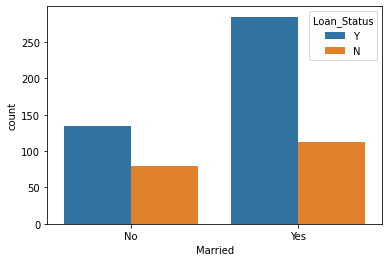

In [80]:
#Getting loan by marrtiage status
sns.countplot(x='Married', hue='Loan_Status', data=train)

chances of getting the loan are much more if the person in married.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

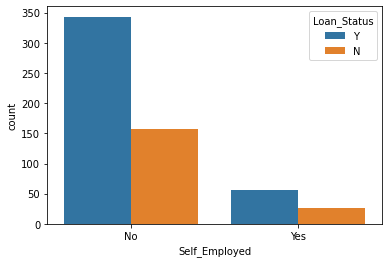

In [81]:
#Getting loan by Self-Employed status
sns.countplot(data=train, x='Self_Employed', hue='Loan_Status')

chances of getting the loan are much more if the person if not self-employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

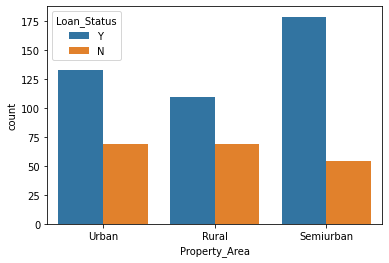

In [82]:
#Getting loan by Property_Area
sns.countplot(data=train, x='Property_Area',hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

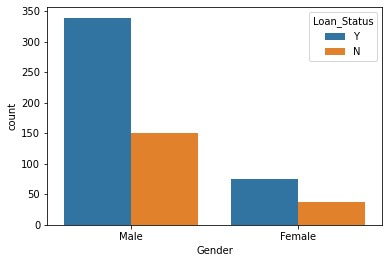

In [83]:
#Getting loan by Gender
sns.countplot(data=train, x='Gender', hue='Loan_Status')

# DATA CLEANING

In [84]:
#Missing values in all columns
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
train['Self_Employed'].fillna('No', inplace=True)

In [86]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

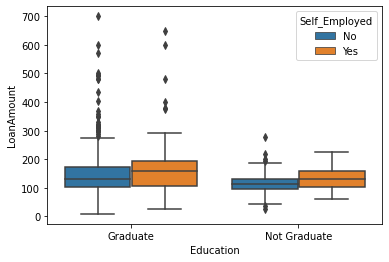

In [87]:
sns.boxplot(data=train, x='Education', hue='Self_Employed', y='LoanAmount')

In [88]:
table= train.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

In [89]:
#Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [90]:
#Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [91]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

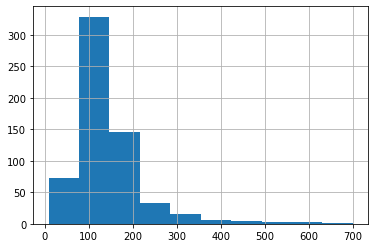

In [92]:
train['LoanAmount'].hist()

In [93]:
train['LoanAmountLog'] = np.log(train['LoanAmount'])

<AxesSubplot:>

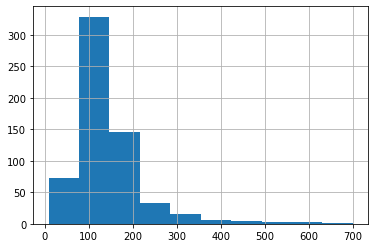

In [94]:
train['LoanAmount'].hist()

Combining both Applicant Income and Coapplicant Income to get Total Income.

In [95]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<AxesSubplot:>

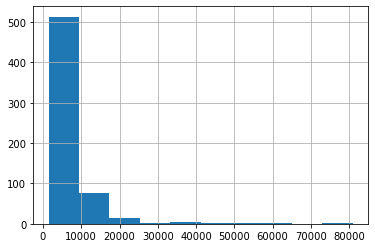

In [96]:
train['TotalIncome'].hist()

In [97]:
train['Ratio'] = train['LoanAmount']/train['TotalIncome']

<AxesSubplot:>

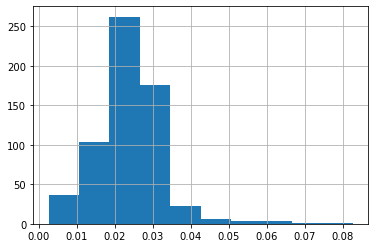

In [98]:
train['Ratio'].hist()

In [99]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmountLog         0
TotalIncome           0
Ratio                 0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

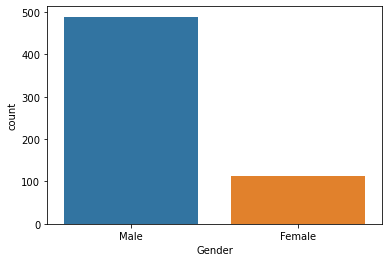

In [100]:
sns.countplot(data=train, x='Gender')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

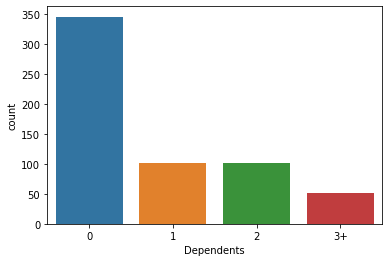

In [101]:
sns.countplot(data=train, x='Dependents')

In [102]:
train['Dependents'].fillna('0', inplace=True)

<AxesSubplot:xlabel='Married', ylabel='count'>

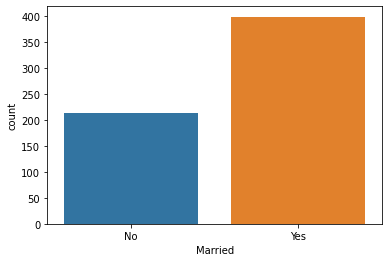

In [103]:
sns.countplot(data=train, x='Married')

the ratio between married and non-married applicants is ~0.5. so, we can't directly impute values.

In [104]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [105]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [106]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmountLog        0
TotalIncome          0
Ratio                0
dtype: int64

In [107]:
sex = pd.get_dummies(train['Gender'], drop_first=True)
married = pd.get_dummies(train['Married'], drop_first=True)

In [108]:
dependents = pd.get_dummies(train['Dependents'], drop_first=True)
self_employed = pd.get_dummies(train['Self_Employed'], drop_first=True)

In [109]:
train = pd.concat([train,sex,married], axis=1)

In [110]:
train.rename(columns={"Yes":"Married Yes"}, inplace=True)

In [111]:
train = pd.concat([train,dependents, self_employed], axis=1)

In [112]:
train.rename(columns={"Yes": "Self-Employed Yes"}, inplace=True)

In [113]:
train.drop(columns=['Gender','Married', 'Dependents', 'Self_Employed'], inplace=True)

In [114]:
education = pd.get_dummies(train['Education'], drop_first=True)
propertyArea = pd.get_dummies(train['Property_Area'], drop_first=True)

In [115]:
train = pd.concat([train, education, propertyArea], axis=1)

In [116]:
train.drop(columns=['Education','Property_Area'], inplace=True)

In [117]:
train.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace=True)

In [118]:
loanStatus = pd.get_dummies(train['Loan_Status'], drop_first=True)

In [119]:
train = pd.concat([train,loanStatus], axis=1)

In [120]:
train.rename(columns={"Y":"LoanStatus Yes"}, inplace=True)

In [121]:
train.drop(columns=['Loan_ID','Loan_Status'], inplace=True)

In [122]:
train.head(5)

,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmountLog,TotalIncome,Ratio,Male,Married Yes,1,2,3+,Self-Employed Yes,Not Graduate,Semiurban,Urban,LoanStatus Yes
0,130.0,360.0,1.0,4.867534,5849.0,0.022226,1,0,0,0,0,0,0,0,1,1
1,128.0,360.0,1.0,4.852030,6091.0,0.021015,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,4.189655,3000.0,0.022000,1,1,0,0,0,1,0,0,1,1
3,120.0,360.0,1.0,4.787492,4941.0,0.024287,1,1,0,0,0,0,1,0,1,1
4,141.0,360.0,1.0,4.948760,6000.0,0.023500,1,0,0,0,0,0,0,0,1,1


In [123]:
train.to_csv("Clean Data.csv")